<a href="https://colab.research.google.com/github/feliperichard/diplodatos2021-datasets/blob/main/TP1_Analisis_y_Visualizacion/Tp1_analisis_y_visualizacion_Grupo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Trabajo Práctico N°1: de Analisis + Visualización

## 1.1 Armado de Cono de Conversión y evolución de uso de un producto digital


### Introducción
En este práctico se pretende obtener una primera aproximación al dataset bajo análisis. En primer lugar se cargan y presentan brevemente los datos. Luego se proponen las consignas a seguir para la resolución del mismo.

In [1]:


import numpy as np
import pandas as pd
 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn 
seaborn.set_context('talk')

In [2]:
# some config
plt.rcParams['figure.figsize'] = (12, 9)

## Carga del dataset

In [3]:
url ="https://raw.githubusercontent.com/feliperichard/diplodatos2021-datasets/main/traffic_AR_CL_UY.csv"
traffic_data = pd.read_csv(url,usecols = ["Fecha", "flow", "Site", "Device", "Loading", "Shipping", "Payments", "Review", "Congrats"], parse_dates=["Fecha"])

Ejecutamos un breve  repaso exploratorio

In [4]:
traffic_data.head(10)

,Fecha,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats
0,2019-03-01,cart,MLA,Android,0,7084,5313,3981,3731
1,2019-03-01,cart,MLA,Desktop,0,5419,4177,3580,3479
2,2019-03-01,cart,MLA,Mobile,0,2426,1832,1373,1290
3,2019-03-01,cart,MLA,iOS,0,1179,856,671,622
4,2019-03-01,direct,MLA,Android,160081,152310,124551,89380,83856
5,2019-03-01,direct,MLA,Desktop,98263,93506,80994,63941,62256
6,2019-03-01,direct,MLA,Mobile,69273,65385,51310,35665,33229
7,2019-03-01,direct,MLA,iOS,29215,27378,23245,17899,16835
8,2019-03-01,direct,MLC,Desktop,14970,14818,12629,10444,9827
9,2019-03-01,direct,MLC,Mobile,14840,14695,11084,8567,7445


In [5]:
traffic_data.set_index("Fecha", inplace = True)

In [6]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7709 entries, 2019-03-01 to 2020-06-30
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   flow      7709 non-null   object
 1   Site      7709 non-null   object
 2   Device    7709 non-null   object
 3   Loading   7709 non-null   int64 
 4   Shipping  7709 non-null   int64 
 5   Payments  7709 non-null   int64 
 6   Review    7709 non-null   int64 
 7   Congrats  7709 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 542.0+ KB


### Descripción de variables

Para describir el comportamienot de los usuarios usaremos 3 variales utilizadas como "indice compuesto"
- **Fecha**
- **flow**
- **Site**
- **Device**

| Nombre   |  Tipo  | Formato      | Descripción |
|:---------|:-------|:------------:|:------------|
| *Fecha   |  Date  |  YYYY-MM-DD  | Los valores corresponde a los eventos registrados durante este día |
| *flow    | String |  direct-cart | Define si el flujo corresponde a compra directa o de carrito      |
| *Site    | String |     XXX      | Describe el site al que corresponden las sesiones   |
| *Device  | String |              | Define el dispositivo donde se ejecuto el flujo de compra |
| Loading  | Entero |              | Cantidad de sesiones que vieron el paso de Loading  |
| Shipping | Entero |              | Cantidad de sesiones que vieron el paso de Shipping |
| Payments | Entero |              | Cantidad de sesiones que vieron el paso de Payments |
| Review   | Entero |              | Cantidad de sesiones que vieron el paso de Review   |
| Congrats | Entero |              | Cantidad de sesiones que vieron el paso de Congrats |

**Observaciones:**
- **Loading**
- **Shipping**
- **Payments**
- **Review**
- **Congrats**


# Consignas del trabajo práctico N°1

El objetivo general del práctico es realizar una análsis exploratorio de __las observaciones__ del dataset.

Se sugiere explorar las series de forma individual y conjunta por medio de medidas descriptivas y visualizaciones, con la finalidad de confeccionar un informe detallado sobre los índices analizados que nos ayude a modelar las series y hacer pronósticos.

Como los valores observados se indizan en relación al tiempo, este tipo de datos se conocen como __series temporales__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. 
El siguiente [tutorial](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/) puede ser de gran ayuda para introducirse en la confección de algunos gráficos para series de tiempo y funcionalidades básicas de pandas para dicho tipo de datos.

   
Para los siguientes puntos elija:
1. Un site por analizar
2. Un tipo de flujo de compra ( compra directa versus modo carrito )
3. Dos plataformas ( Se sugiere tomar una Web Desktop o Mobile y otra de las applicaciones Android o iOS ej: Desktop vs Android )
4. De necesitarlo necesitará resamplear los valores a nivel de día como mínimo
5. Una vez ejecutado los pasos anterioes debería contar con 2 series temporales ( y no todo el dataset ) referidas al mismo pais pero en 2 plataformas diferentes.

Se proponen las siguientes actividades:

- Determine el tipo de variables y el período de tiempo bajo análisis

- Indague sobre la existencia de valores faltantes.  

- ¿Cómo trataría a los faltantes? ¿Por qué? (El tratamiento de valores faltantes será parte del 
    práctico de curación y pueden omitirlos, en caso de necesitar inputar valores pueden tomar periodos que ls omitan )
 

- Analice las distribuciones por medio de gráficos(por ejemplo: histogramas y boxplots) y medidas de estadística descriptiva (por ejemplo: media, varianza y coeficiente de variación). Puede derivar alguna afirmación del análisis de los coeficientes de asimetría y kurtosis

- ¿Hay outliers? Si es así, ¿qué sugiere hacer con ellos?

- Seleccione una serie temporal de las anteriores y grafique un boxplot para cada mes. 
  - ¿Se mantiene inalterada en el tiempo la distribución?

- Una buena forma de explorar la evolución y efectividad de este tipo de productos digitales es armar **un cono de conversion**, que es un histograma donde cada columna es un paso del flujo y refleja el total de sesiones acumulada en el paso durante un periodo de timepo dado
    - La idea es poder refresentar el cono de conversion parecida a la inferior 
    - Usaremos los pasos de Shipping hasta Congrats ( podemos obviar Loading )
    - Basandose en lo anterior podría afirmar que una plataforma es más eficiente que otra ( más sessiones al final del cono de conversion )

![Cono de conversion](https://github.com/luisdvlpr/diplodatos2021-datasets/blob/main/TP1_Analisis_y_Visualizacion/assets/ConoDeConversion.png?raw=1)

- Estudie la evolución temporal de las observaciones. 
  - ¿En qué sentido tienden a moverse? 
  - ¿Hay períodos de crisis(caídas fuertes y repentinas de los índices)? ¿Podría asociarlos a eventos?
  - ¿Coinciden con las noticias? 
  - ¿Los índices tienden a moverse en forma conjunta?  

- Investigue si las observaciones tienden a moverse en forma conjunta. ¿Siempre se da dicho patrón?

![Cono de conversion](https://github.com/luisdvlpr/diplodatos2021-datasets/blob/main/TP1_Analisis_y_Visualizacion/assets/Evolucion.png?raw=1)

- **Extra Mile**
    - Seleccione un serie de referencia y confeccione un diagrama de dispersión entre el mismo y su valor retardado un período. Repita con valores de retardo hasta 7 periodos
 
    - Grafique e interprete las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El siguiente [INTRO a ACF PACF](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para una primera aproximación


Para la ejecución de los ultimos puntos tambienpuede basarse en las siguientes referencias

[ Visualizaciones de series temporales ](https://learnpython.com/blog/python-data-visualization-pandas-matplotlib/)

[ Visualización y Analisis de Series Temporales ]( https://kanoki.org/2020/04/27/time-series-analysis-data-visualization/ )

In [7]:
traffic_data.describe()

,Loading,Shipping,Payments,Review,Congrats
count,7709.000000,7709.000000,7709.000000,7709.000000,7709.000000
mean,59812.627578,41020.260215,32995.177195,23618.913218,22062.731353
std,90159.336686,68292.573307,55533.579166,38040.625869,35394.961006
min,0.000000,19.000000,17.000000,10.000000,8.000000
25%,6805.000000,6485.000000,5241.000000,4109.000000,3866.000000
50%,22340.000000,14553.000000,11036.000000,8379.000000,7631.000000
75%,75071.000000,40908.000000,32645.000000,24390.000000,22674.000000
max,563592.000000,537723.000000,444330.000000,286162.000000,264742.000000


In [8]:
traffic_data.describe(include="object")

,flow,Site,Device
count,7709,7709,7709
unique,2,3,4
top,direct,MLA,Desktop
freq,5746,3903,1957


In [9]:
traffic_data.Site.unique()

array(['MLA', 'MLC', 'MLU'], dtype=object)

In [10]:
traffic_data.Device.unique()

array(['Android', 'Desktop', 'Mobile', 'iOS'], dtype=object)

###Filtros

Vamos a tomar:

Flow = carrito
Site = MLC
Device = Desktop y iOS




In [11]:
td1=traffic_data.loc[(traffic_data["Site"]=="MLC") & (traffic_data["flow"]=="direct") ,:]
tdf = td1.loc[td1["Device"].isin(["Desktop","iOS","Android"]),:]
len(tdf)

1410

###Determinación de datos faltantes

Las variables categoricas tienen la misma cantidad registros por lo que no hay datos faltantes.

Sin embargo se observa 0 en Loading por lo que hay perdida de datos

In [12]:
tdf.describe(include='all').round()


,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats
count,1410,1410,1410,1410.0,1410.0,1410.0,1410.0,1410.0
unique,1,1,3,NaN,NaN,NaN,NaN,NaN
top,direct,MLC,Desktop,NaN,NaN,NaN,NaN,NaN
freq,1410,1410,488,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,25437.0,25310.0,19645.0,15436.0,14369.0
std,NaN,NaN,NaN,19965.0,19998.0,15552.0,12205.0,11438.0
min,NaN,NaN,NaN,0.0,1831.0,1223.0,993.0,876.0
25%,NaN,NaN,NaN,9420.0,9154.0,7344.0,5950.0,5507.0
50%,NaN,NaN,NaN,20821.0,20566.0,16354.0,13042.0,12166.0
75%,NaN,NaN,NaN,33932.0,33849.0,25529.0,19365.0,18115.0


Abajo se puede corroborar la cantidad de dias que el loading es zero.

In [13]:
tdf.isin([0]).sum()

flow        0
Site        0
Device      0
Loading     3
Shipping    0
Payments    0
Review      0
Congrats    0
dtype: int64

Con este codigo reemplazamos los 0 con la mediana y volvemos a contar la cantidad de 0

In [14]:

M = tdf["Loading"].median()
tdf["Loading"] = tdf["Loading"].replace(0,M)
tdf.isin([0]).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


flow        0
Site        0
Device      0
Loading     0
Shipping    0
Payments    0
Review      0
Congrats    0
dtype: int64

Ahora revisamos si falta algun dia en el dataset.

hay 488 dias en el dataset por lo que no hay faltantes de dias completos. La diferencia entre fechas no incluye un extremo por eso da 487 y la cantidad de fechas unicas 488

In [15]:

min=tdf.index.min()
print(min)
max=tdf.index.max()
print(max)
max-min


2019-03-01 00:00:00
2020-06-30 00:00:00


Timedelta('487 days 00:00:00')

In [16]:
tdf.index.unique()

DatetimeIndex(['2019-03-01', '2019-03-02', '2019-03-03', '2019-03-04',
               '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08',
               '2019-03-09', '2019-03-10',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', name='Fecha', length=488, freq=None)

In [17]:
max-min

Timedelta('487 days 00:00:00')

###Visualización de datos



####Tendencias generales

Resampleamos a mes para entender el comportamiento de largo plazo.

So obsrva un valor de transacciones estable durante el año 2019 con un pico en diciembre que se presume esta relacionado a la estacionalidad por las fiestas. Enero y Febrero baja y a partir de Marzo se dispara. Este comportamiento es congruente con el crecimiento en el comercio electrónico como consecuencia de la pandemia


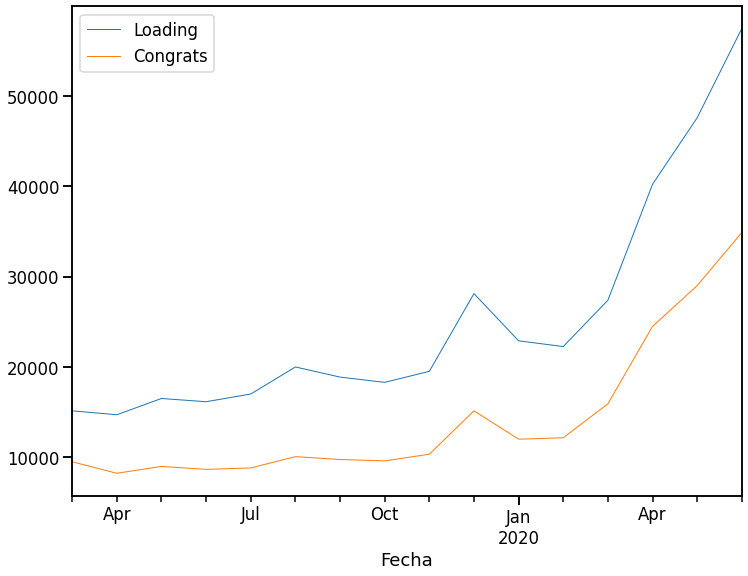

In [18]:
cols_plot = ["Loading",	"Congrats"]
tdf_m = tdf[cols_plot].resample("M").mean()
tdf_m[cols_plot].plot(linewidth=1)

#### Distribution

In [45]:
tdf_And = td1.loc[td1["Device"].isin(["Android"]),:]
tdf_iOS = td1.loc[td1["Device"].isin(["iOS"]),:]
tdf_Dk = td1.loc[td1["Device"].isin(["Desktop"]),:]
tdf_And.head()

,flow,Site,Device,Loading,Shipping,Payments,Review,Congrats
Fecha,,,,,,,,
2019-03-28,direct,MLC,Android,21561,19924,14632,11292,10491
2019-03-29,direct,MLC,Android,20860,20879,15535,11839,10908
2019-03-30,direct,MLC,Android,19649,19629,14389,10858,9951
2019-03-31,direct,MLC,Android,21849,21923,15804,11780,10754
2019-04-01,direct,MLC,Android,29071,29112,21921,16919,15671


In [43]:

tdf_Device = tdf.pivot(columns="Device", values="Payments")
tdf_Device.head()

Device,Android,Desktop,iOS
Fecha,,,
2019-03-01,NaN,12629.0,NaN
2019-03-02,NaN,6946.0,NaN
2019-03-03,NaN,7940.0,NaN
2019-03-04,NaN,18204.0,NaN
2019-03-05,NaN,17804.0,NaN


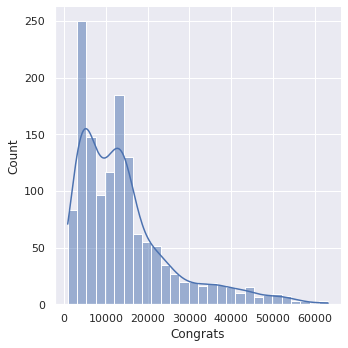

In [39]:
seaborn.displot(tdf_And["Congrats"],kde=True)




In [55]:
tdf_And["Congrats"].skew()

1.17502905922037

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

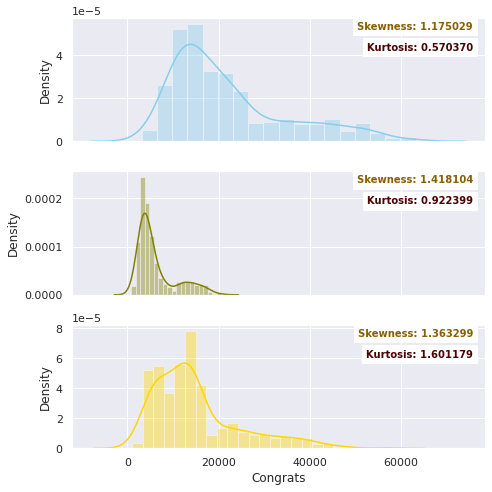

In [61]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(3, 1, figsize=(7, 7), sharex=True)
sns.distplot(tdf_And["Congrats"], color="skyblue", ax=axes[0])
sns.distplot(tdf_iOS["Congrats"], color="olive", ax=axes[1])
sns.distplot(tdf_Dk["Congrats"], color="gold", ax=axes[2])

array = [ tdf_And["Congrats"], tdf_iOS["Congrats"],tdf_Dk["Congrats"]]


for i, ax in enumerate(axes.reshape(-1)):
  ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % array[i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
  ax.text(x=0.97, y=0.80, transform=ax.transAxes, s="Kurtosis: %f" % array[i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
    
plt.tight_layout()

#### Outliers


In [22]:
#para agrupar creamos una columna por dia y otra para el mes. Despues agrupamos por dia e imprimimos la cantidad de registros que tiene que ser igual a la cantidad de dias.
tdf["dia"]=tdf.index
tdf_day = tdf.groupby(["dia"],as_index=False).sum()
tdf_day["periodo"]=tdf_day["dia"].dt.strftime('%Y-%m')
len(tdf_day)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


488

En el siguiente boxplot podemos ver los outliers en los meses de mayo y octubre.  No se observan outliers durante el 2020.

Como podrá observarse mas abajo, los eventos de marketing del 2019 generaron niveles de trafico fuera de lo normal que es capturado por el grafico.

Si bien ocurrieron eventos de hotsale en mayo del 2020, estos no llegan a modificar el patron de trafico lo suficiente como para ser considerados outliers. 



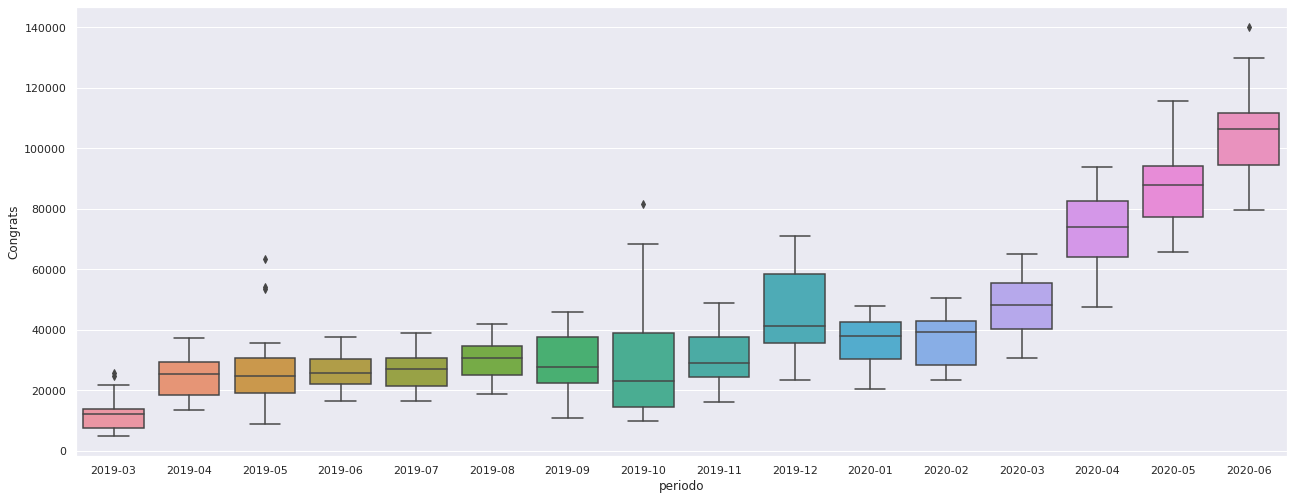

In [23]:
import seaborn as sns

sns.set(rc={'figure.figsize':(21.7,8.27)})

sns.boxplot(data=tdf_day, x="periodo", y="Congrats")


Para el mes de mayo se observan los 2 outliers que tienen que ver con el cyber day que ocurrio entre el 27 y el 29 de mayo en Chile
https://www.ecommerceccs.cl/cyberday-2019/


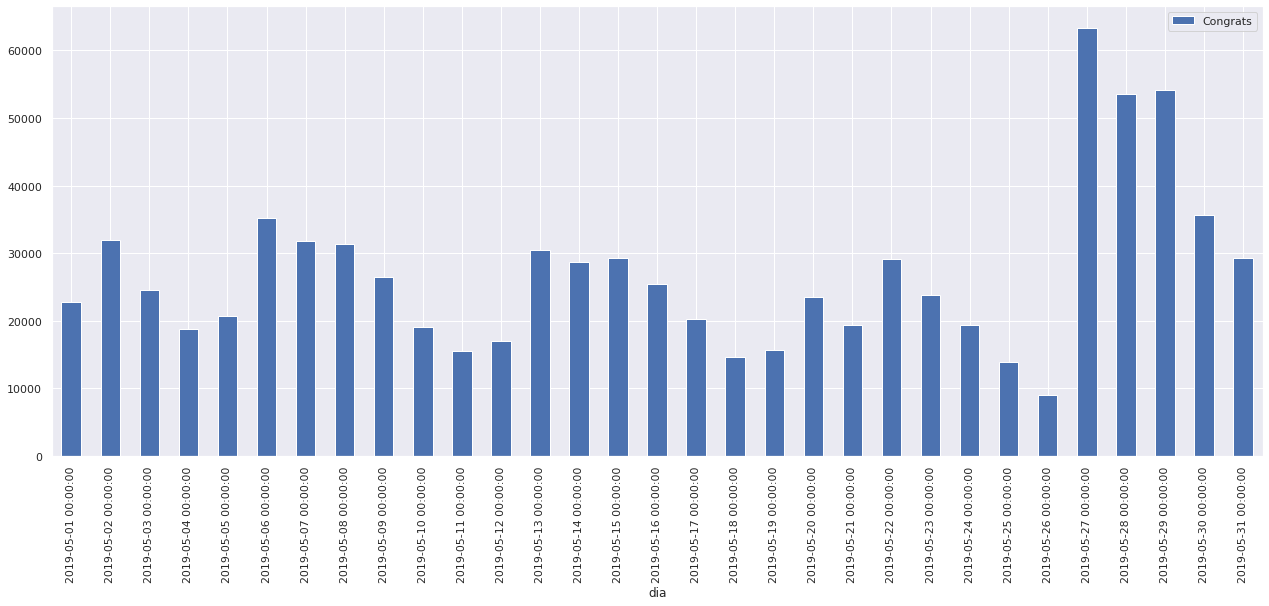

In [24]:
tdf_day_mayo =tdf_day[(tdf_day["dia"]>"2019-04-30") & (tdf_day["dia"]<"2019-06-01")]
cols_plot = ["Congrats"]
tdf_day_mayo.set_index("dia",inplace=True)
tdf_day_mayo[cols_plot].plot(linewidth=1,kind="bar")

cyber monday en Chile entre el 7 y el 9 de octubre
https://www.fayerwayer.com/2019/09/cyber-monday-2019-octubre/

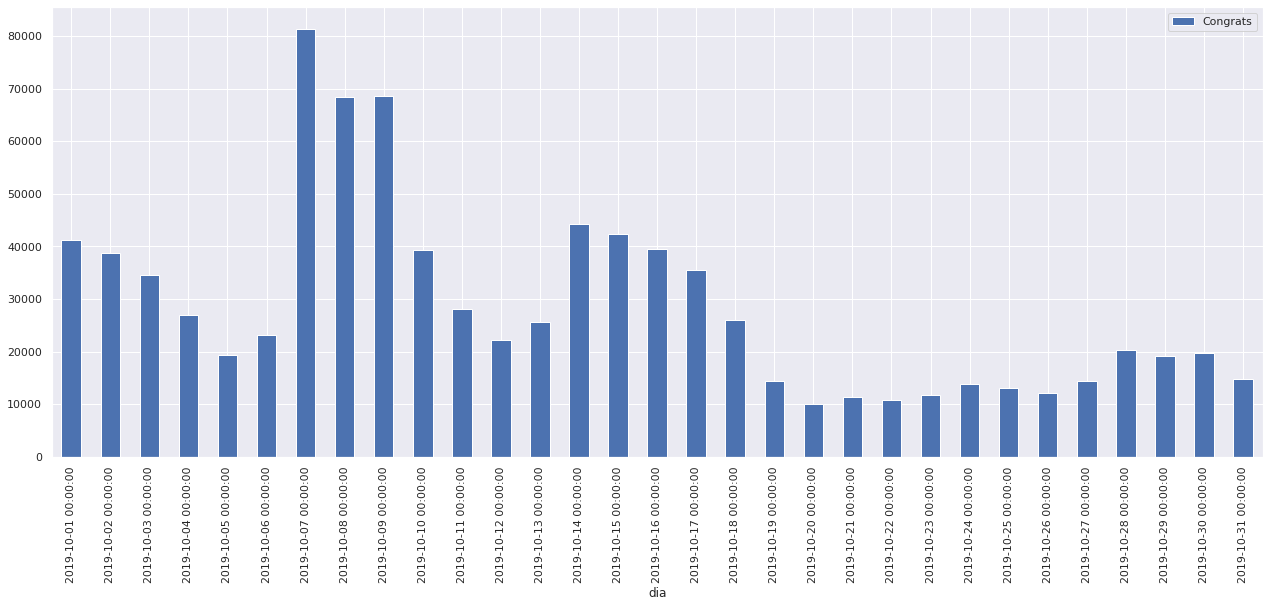

In [25]:
tdf_day_oct =tdf_day[(tdf_day["dia"]>"2019-09-30") & (tdf_day["dia"]<"2019-11-01")]
cols_plot = ["Congrats"]
tdf_day_oct.set_index("dia",inplace=True)
tdf_day_oct[cols_plot].plot(linewidth=1,kind="bar")


####*Conversion y tráfico*

Al analizarse el tráfico se observa que la plataforma Android es la que mas tráfico genera siendo casi el doble que desktop



In [26]:
Conv = tdf.groupby(["Device"]).sum()


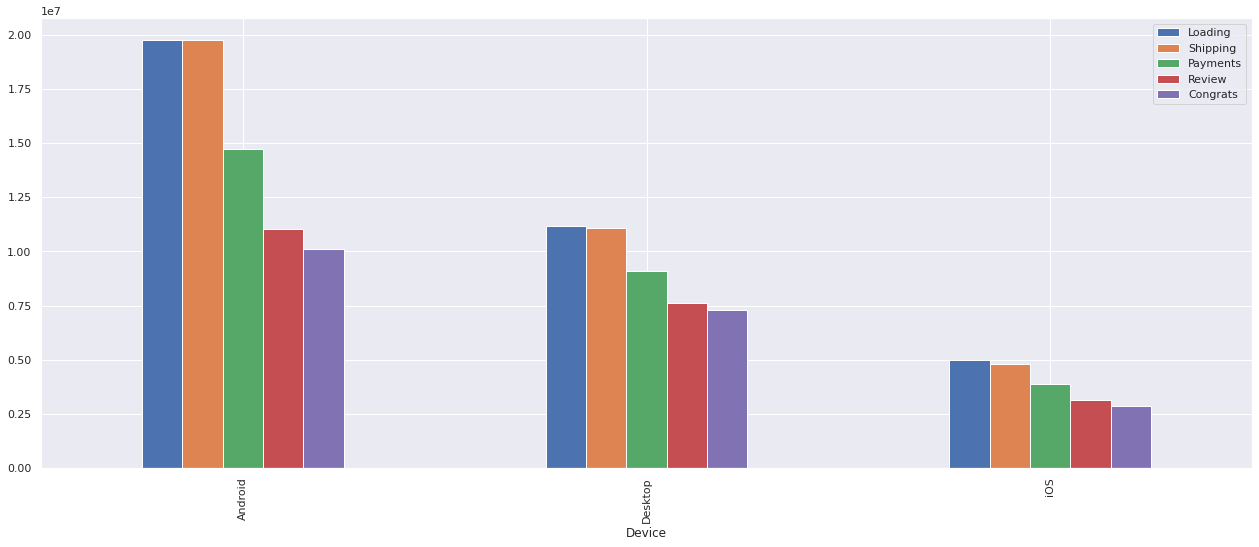

In [27]:
Conv.plot(kind="bar")

In [28]:
#Creamos la tasa de caidas de usuarios en cadad etapa
Conv["Drop-out Shipping"] = 1-Conv["Shipping"]/Conv["Loading"]
Conv["Drop-out Payments"] = 1-Conv["Payments"]/Conv["Shipping"]
Conv["Drop-out Review"] = 1-Conv["Review"]/Conv["Payments"]
Conv["Drop-out Congrats"] = 1-Conv["Congrats"]/Conv["Review"]
Conv["Drop-Out Total"] = 1-Conv["Congrats"]/Conv["Review"]


Sin embargo, tambien Android es la platforma que mas caida de usarios siendo mas del doble que Desktop

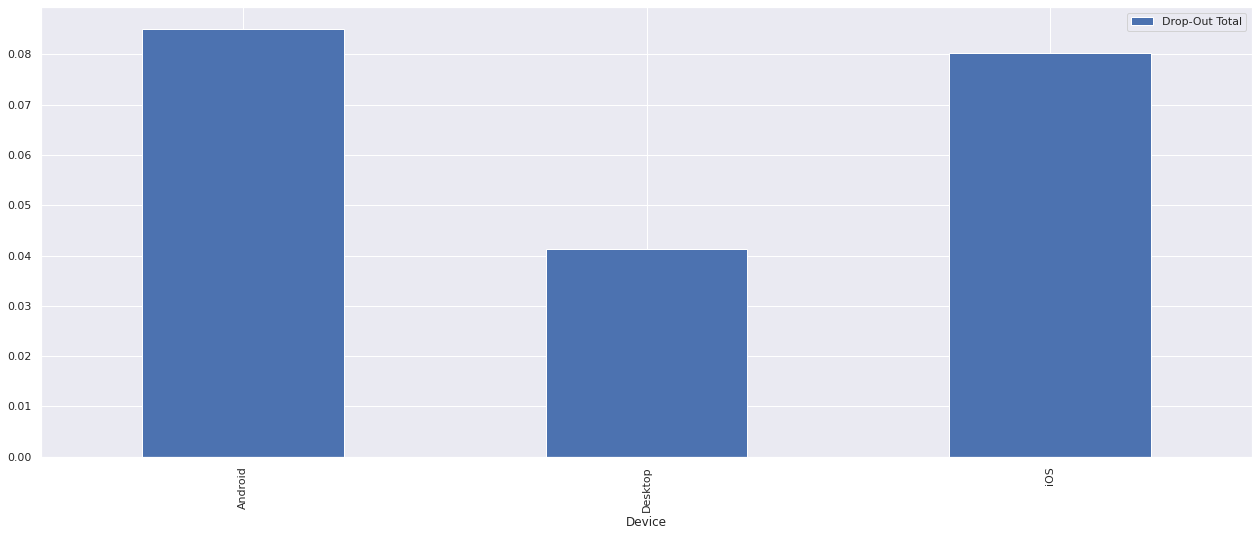

In [29]:
Cols_Plot = ["Drop-Out Total"]
Conv[Cols_Plot].plot(kind="bar")

En este grafico se puede observar la tasa de caída de usuriros por estapa siendo payments y review las dos etapas donde claramente se caen mayor cantidad de transacciones

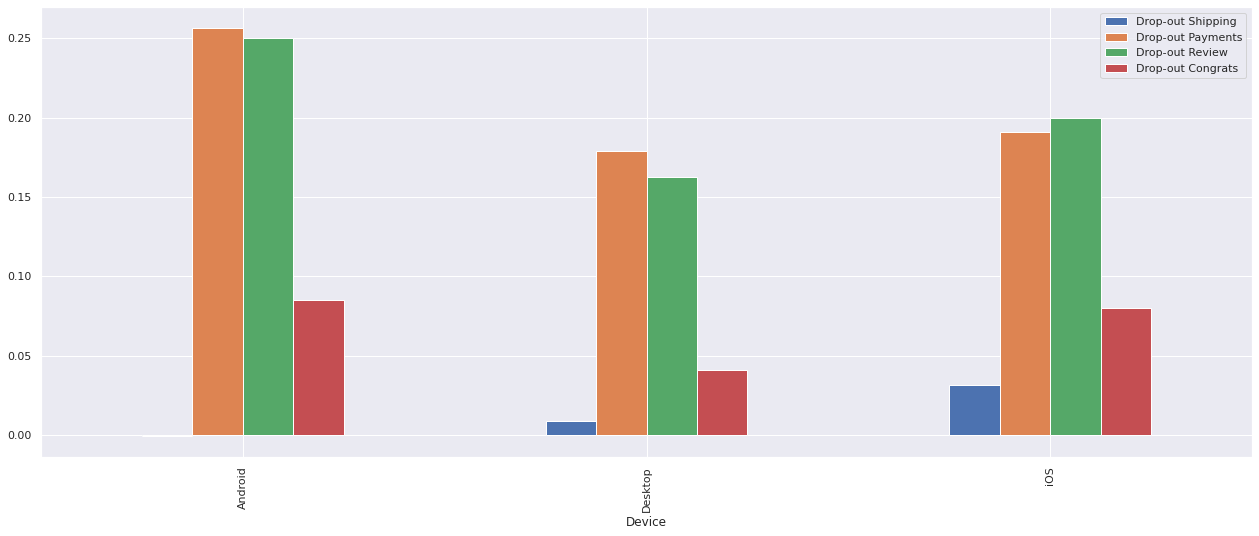

In [30]:
Cols_Plot = ["Drop-out Shipping","Drop-out Payments","Drop-out Review","Drop-out Congrats"]
Conv[Cols_Plot].plot(kind="bar")

Loading tiene datos faltantes por lo que ploteamos Shipping y Cograts que son la primer y ultima etapa del funnel que estan completos

Resampleamos las muestras a semana

## Fecha de entrega

- __Versión preliminar: __ 

- __Version final: __

## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. 
El mismo debe estar pensado para un público técnico pero que desconoce lel dominio del problema a resolver tal como los compañeros de clase. 

Dicho informe puede ser un notebook, la condición de que en el mismo se efectúe un análisis escrito que permita describir y trasmitir las conclusiones a traves de las visualizaciones

## Snippets y recortes útiles para arrancar rápido

In [31]:
# Filter values by  site, flow, and platform 
# https://medium.com/swlh/3-ways-to-filter-pandas-dataframe-by-column-values-dfb6609b31de

filtered = traffic_data.loc[
    ( traffic_data["flow"] == "direct"    ) &  
    ( traffic_data["Site"] == "MLA"       ) & 
    ( traffic_data["Device"] == "Android" ) 
]

# setting first name as index column
filtered.set_index("Fecha", inplace = True)

KeyError: ignored

In [ ]:

filtered['Congrats'].plot(grid = True)

In [ ]:
# Filtrar o definir un periodo de analisis puede hacerse con

# filtered.loc['2020-03-01':'2020-05-01']
filtered['2020-03-01':'2020-05-01']['Congrats'].plot(grid = True)